# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/')

Mounted at /content/drive


Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
# %jupyter nbconvert --to html Copy\ of\ robot_vacuum.ipynb

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
%pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('west')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: west
step 1 - action: south
step 2 - action: south
step 3 - action: north
step 4 - action: west
step 5 - action: west
step 6 - action: east
step 7 - action: suck
step 8 - action: suck
step 9 - action: suck
step 10 - action: south
step 11 - action: west
step 12 - action: suck
step 13 - action: east
step 14 - action: south
step 15 - action: west
step 16 - action: suck
step 17 - action: north
step 18 - action: west
step 19 - action: west


5

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
# Your code and description goes here
import numpy as np

# Các action có thể của robot
actions = ["north", "east", "south", "west", "suck"]

# Chọn hành động ngẫu nhiên với simple_randomized_agent
def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

# Task 1: Môi trường mô phỏng robot hút bụi
def vacuum_environment(agent_function, n=5, p=0.2, max_steps=100, verbose=True):
    """
    Môi trường mô phỏng robot hút bụi theo PEAS:
    - n x n ô
    - Mỗi ô bẩn với xác suất p
    - Robot bắt đầu tại ô ngẫu nhiên
    - Agent nhận cảm biến: bumpers và dirt
    - Trả về số bước robot đã thực hiện để làm sạch toàn bộ phòng
    """

    # 1. Khởi tạo phòng
    # True = dirty, False = clean
    room = np.random.rand(n, n) < p
    # Vị trí robot: [row, col]
    robot_pos = [np.random.randint(0, n), np.random.randint(0, n)]
    steps = 0
    log = []   # Lưu log để in 5 bước cuối

    # Hàm trả về trạng thái bumpers (True nếu chạm tường)
    def get_bumpers(pos):
        row, collumn = pos
        return {
            "north": row == 0,
            "south": row == n-1,
            "west": collumn == 0,
            "east": collumn == n-1
        }

    # Hàm hiển thị phòng
    def display_room(current_pos, room_state):
      for i in range(n):
          row = ""
          for j in range(n):
              if i == current_pos[0] and j == current_pos[1]:
                  row += "R "
              elif room_state[i, j]:
                  row += "D "
              else:
                  row += ". "
          print(row)
      print("-" * (n*2))

    # 2. Vòng lặp hành động robot
    for step in range(max_steps):
        steps += 1
        bumpers = get_bumpers(robot_pos)
        dirty = room[robot_pos[0], robot_pos[1]]

        # Lấy action từ agent
        action = agent_function(bumpers, dirty)

        # Lưu trạng thái để in 5 bước cuối
        log.append((step, robot_pos.copy(), dirty, action, room.copy()))

        # 3. Thực hiện action
        if action == "suck":
            room[robot_pos[0], robot_pos[1]] = False
        elif action == "north" and not bumpers["north"]:
            robot_pos[0] -= 1
        elif action == "south" and not bumpers["south"]:
            robot_pos[0] += 1
        elif action == "west" and not bumpers["west"]:
            robot_pos[1] -= 1
        elif action == "east" and not bumpers["east"]:
            robot_pos[1] += 1

        # Nếu phòng đã sạch, dừng vòng lặp
        if not room.any():
            break
    # 4. In 5 bước cuối cùng khi verbose=True
    if verbose:
        for entry in log[-5:]:
            step, pos, dirty, action, room_state = entry
            print(f"Step {step+1}: Robot at {pos}, Dirty={dirty}, Action={action}")
            display_room(pos, room_state)
        if not room.any():
            print(f"All clean! Steps taken: {steps}")
    return steps

Show that your environment works with the simple randomized agent from above.

In [ ]:
# Your code and description goes here
# Test môi trường với simple_randomized_agent
steps_taken = vacuum_environment(simple_randomized_agent, n=5, p=0.05, max_steps=400, verbose=True)
print(f"Steps taken by the agent: {steps_taken}")

Step 223: Robot at [1, 2], Dirty=False, Action=north
. D . . . 
. . R . . 
. . . . . 
. . . . . 
. . . . . 
----------
Step 224: Robot at [0, 2], Dirty=False, Action=suck
. D R . . 
. . . . . 
. . . . . 
. . . . . 
. . . . . 
----------
Step 225: Robot at [0, 2], Dirty=False, Action=west
. D R . . 
. . . . . 
. . . . . 
. . . . . 
. . . . . 
----------
Step 226: Robot at [0, 1], Dirty=True, Action=north
. R . . . 
. . . . . 
. . . . . 
. . . . . 
. . . . . 
----------
Step 227: Robot at [0, 1], Dirty=True, Action=suck
. R . . . 
. . . . . 
. . . . . 
. . . . . 
. . . . . 
----------
All clean! Steps taken: 227
Steps taken by the agent: 227


## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [ ]:
# Your code and description goes here
import numpy as np

# Các action
actions = ["north", "east", "south", "west", "suck"]

def simple_reflex_agent(bumpers, dirty):
    """
    Simple reflex agent:
    - Nếu ô hiện tại bẩn -> hút bụi
    - Nếu không -> chọn di chuyển ngẫu nhiên nhưng không đụng tường
    """
    if dirty:
        return "suck"

    # Lọc các hướng khả dụng dựa trên bumpers
    possible_moves = [dir for dir, blocked in bumpers.items() if not blocked]

    if possible_moves:
        return np.random.choice(possible_moves)
    else:
        # Nếu xung quanh là tường hết, chỉ còn hút bụi
        return "suck"

Show how the agent works with your environment.

In [ ]:
# Your code and description goes here
# Test simple reflex agent trên môi trường Task 1
steps_taken = vacuum_environment(simple_reflex_agent, n=5, p=0.2, max_steps=200, verbose=True)
print(f"Steps taken by simple reflex agent: {steps_taken}")

Step 114: Robot at [2, 2], Dirty=False, Action=east
. . . . D 
. . . . . 
. . R . . 
. . . . . 
. . . . . 
----------
Step 115: Robot at [2, 3], Dirty=False, Action=north
. . . . D 
. . . . . 
. . . R . 
. . . . . 
. . . . . 
----------
Step 116: Robot at [1, 3], Dirty=False, Action=east
. . . . D 
. . . R . 
. . . . . 
. . . . . 
. . . . . 
----------
Step 117: Robot at [1, 4], Dirty=False, Action=north
. . . . D 
. . . . R 
. . . . . 
. . . . . 
. . . . . 
----------
Step 118: Robot at [0, 4], Dirty=True, Action=suck
. . . . R 
. . . . . 
. . . . . 
. . . . . 
. . . . . 
----------
All clean! Steps taken: 118
Steps taken by simple reflex agent: 118


## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# Your short description of the state and your implementation goes here
#### Cách thiết kế agent state trong task 3 là ta trước tiên nên rằng mục tiêu của model-based agent là
#### ghi nhớ những gì đã làm và đã quan sát để ra quyết định tốt hơn so với simple reflex agent.

#### Trong đó agent lưu vị trí hiện tại trong phòng, giúp nó biết mình đang ở đâu và không bị lạc đường
#### trong quá trình di chuyển.

#### Nó còn lưu thông tin về những ô đã ghé qua, mỗi ô sẽ được đánh dấu khi agent đã đến đó.

#### Cuối cùng là tổng số ô đã hút bụi, giúp ta theo dõi tiến trình làm sạch căn phòng và đánh giá
#### được hiệu suất.

#### Cách agent hoạt động là dựa trên state và percepts, đầu tiên agent nhận thông tin từ cảm biến
#### xem ô hiện tại có bẩn không và thông tin tường ở bốn hướng, sau đó ra quyết định hành động dựa
#### trên state và percepts.

#### Nếu ô hiện tại bẩn thì sẽ dùng action "suck" để làm sạch.

#### Nếu ô hiện tại sạch thì sẽ chọn di chuyển tới một ô chưa đi (dựa vào ma trận đã đi qua) theo ưu
#### tiên: north → east → south → west.

#### Nếu tất cả ô xung quanh đã đi hoặc là tường → chọn bất kỳ hướng hợp lệ để tiếp tục.

#### Sau đó cập nhật state sau mỗi hành động:

#### - Khi hút bụi: đánh dấu ô đã sạch trong visited và tăng total_cleaned
#### - Khi di chuyển: cập nhật vị trí row và col hiện tại.

#### Vậy chiến lược tổng thể của agent là agent bắt đầu từ vị trí ngẫu nhiên, sau đó dùng thông tin
#### state để quét toàn bộ phòng theo lưới, tránh đi lại vào các ô đã sạch với mục tiêu cuối cùng là
#### làm sạch tất cả ô bẩn với ít bước di chuyển nhất.


In [ ]:
import numpy as np

# Các action
actions = ["north", "east", "south", "west", "suck"]

# State nội bộ (module-level dict)
_agent_state = {
    'n': 5,
    'position': [0, 0],
    'room_map': None,
    'visited': None,
    'is_located': False,
    'path': [],
    'step': 0
}

def reset_agent_state(n=5):
    """Khởi tạo state trước khi chạy agent."""
    global _agent_state
    _agent_state = {
        'n': n,
        'position': [0, 0],
        'room_map': np.zeros((n, n), dtype=bool),  # False=clean/unknown, True=dirty
        'visited': np.zeros((n, n), dtype=bool),   # Ô đã thăm
        'is_located': False,
        'path': [],
        'step': 0
    }

def model_based_reflex_agent(bumpers, dirty):
    """
    Model-based reflex agent (non-OOP):
    - Giai đoạn 1: Đi north, west để định vị tại [0,0].
    - Giai đoạn 2: Di chuyển zigzag để thăm mọi ô, hút bụi khi bẩn.
    Parameters:
        bumpers (dict): {"north": bool, "south": bool, "west": bool, "east": bool}
        dirty (bool): Ô hiện tại bẩn (True) hay sạch (False)
    Returns:
        action (str): "north", "east", "south", "west", hoặc "suck"
    """
    global _agent_state
    n = _agent_state['n']
    position = _agent_state['position']
    row, col = position
    room_map = _agent_state['room_map']
    visited = _agent_state['visited']
    is_located = _agent_state['is_located']
    path = _agent_state['path']
    step = _agent_state['step']

    # Cập nhật state: ô hiện tại bẩn/sạch, đã thăm
    room_map[row, col] = dirty
    visited[row, col] = True

    # Giai đoạn 1: Định vị tại [0,0]
    if not is_located:
        if bumpers["north"] and bumpers["west"]:
            _agent_state['is_located'] = True
            _agent_state['position'] = [0, 0]
            # Tạo đường đi zigzag: hàng chẵn (left→right), hàng lẻ (right→left)
            path = []
            for r in range(n):
                if r % 2 == 0:
                    for c in range(n):
                        path.append((r, c))
                else:
                    for c in range(n-1, -1, -1):
                        path.append((r, c))
            _agent_state['path'] = path
        elif not bumpers["north"]:
            position[0] -= 1
            _agent_state['position'] = position
            return "north"
        elif not bumpers["west"]:
            position[0] = 0  # Reset row khi chuyển sang west
            position[1] -= 1
            _agent_state['position'] = position
            return "west"

    # Giai đoạn 2: Hút bụi hoặc di chuyển zigzag
    if dirty:
        return "suck"

    if step >= len(path):
        return "suck"  # Tránh treo nếu hết đường

    # Lấy vị trí tiếp theo trong zigzag
    next_pos = path[step]
    _agent_state['step'] += 1

    # Chọn action để đến next_pos
    if next_pos[0] == row + 1:
        position[0] += 1
        _agent_state['position'] = position
        return "south"
    elif next_pos[0] == row - 1:
        position[0] -= 1
        _agent_state['position'] = position
        return "north"
    elif next_pos[1] == col + 1:
        position[1] += 1
        _agent_state['position'] = position
        return "east"
    elif next_pos[1] == col - 1:
        position[1] -= 1
        _agent_state['position'] = position
        return "west"

    return "suck"  # Dự phòng

Show how the agent works with your environment.

In [ ]:
# Your code goes here
# Test với vacuum_environment
np.random.seed(42)
reset_agent_state(n=5)
steps_taken = vacuum_environment(model_based_reflex_agent, n=5, p=0.2, max_steps=200, verbose=True)
print(f"Steps taken by model-based reflex agent: {steps_taken}")

Step 30: Robot at [3, 1], Dirty=False, Action=suck
. . . . . 
. . . . . 
. . . . . 
D R . . . 
. D . . . 
----------
Step 31: Robot at [3, 0], Dirty=True, Action=suck
. . . . . 
. . . . . 
. . . . . 
R . . . . 
. D . . . 
----------
Step 32: Robot at [3, 0], Dirty=False, Action=suck
. . . . . 
. . . . . 
. . . . . 
R . . . . 
. D . . . 
----------
Step 33: Robot at [4, 0], Dirty=False, Action=suck
. . . . . 
. . . . . 
. . . . . 
. . . . . 
R D . . . 
----------
Step 34: Robot at [4, 1], Dirty=True, Action=suck
. . . . . 
. . . . . 
. . . . . 
. . . . . 
. R . . . 
----------
All clean! Steps taken: 34
Steps taken by model-based reflex agent: 34


## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))


Running for grid size 5x5 ...
Randomized Agent on 5x5: 377.59
Simple Reflex Agent on 5x5: 120.51
Model-based Reflex Agent on 5x5: 109.41

Running for grid size 10x10 ...
Randomized Agent on 10x10: 1969.67
Simple Reflex Agent on 10x10: 892.99
Model-based Reflex Agent on 10x10: 163.32

Running for grid size 100x100 ...
Randomized Agent on 100x100: 2000.00
Simple Reflex Agent on 100x100: 2000.00
Model-based Reflex Agent on 100x100: 2000.00

=== Average Performance (100 runs) ===
Size	Randomized	Simple Reflex	Model-based Reflex
5x5	377.59		120.51		109.41
10x10	1969.67		892.99		163.32
100x100	2000.00		2000.00		2000.00


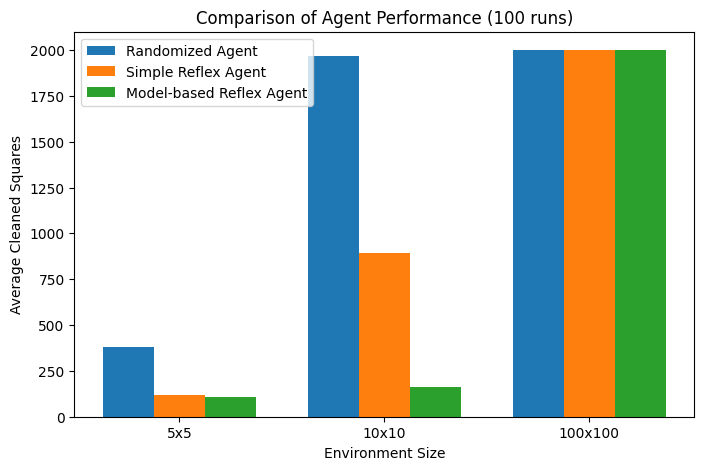

In [ ]:
# Your code goes here
import numpy as np
import matplotlib.pyplot as plt

# Hàm chạy nhiều lần và lấy trung bình số ô đã clean
def evaluate_agent(agent_func, env_func, n, p=0.2, max_steps=200, runs=100, model_based=False):
    results = []
    for _ in range(runs):
        if model_based:
            reset_agent_state(n)  # reset state cho agent model-based
        cleaned = env_func(agent_func, n=n, p=p, max_steps=max_steps, verbose=False)
        results.append(cleaned)
    return np.mean(results)

# So sánh 3 agent
def simulation_study():
    sizes = [5, 10, 100]
    agents = {
        "Randomized Agent": (simple_randomized_agent, False),
        "Simple Reflex Agent": (simple_reflex_agent, False),
        "Model-based Reflex Agent": (model_based_reflex_agent, True),
    }

    results = {name: [] for name in agents.keys()}

    for size in sizes:
        print(f"\nRunning for grid size {size}x{size} ...")
        for name, (agent, is_model) in agents.items():
            avg_cleaned = evaluate_agent(
                agent, vacuum_environment, n=size, p=0.2, max_steps=2000, runs=100, model_based=is_model
            )
            results[name].append(avg_cleaned)
            print(f"{name} on {size}x{size}: {avg_cleaned:.2f}")

    # Hiển thị bảng
    print("\n=== Average Performance (100 runs) ===")
    print("Size\tRandomized\tSimple Reflex\tModel-based Reflex")
    for i, size in enumerate(sizes):
        print(f"{size}x{size}\t{results['Randomized Agent'][i]:.2f}\t\t{results['Simple Reflex Agent'][i]:.2f}\t\t{results['Model-based Reflex Agent'][i]:.2f}")

    # Vẽ biểu đồ
    x = np.arange(len(sizes))
    width = 0.25
    plt.figure(figsize=(8, 5))
    plt.bar(x - width, results["Randomized Agent"], width, label="Randomized Agent")
    plt.bar(x, results["Simple Reflex Agent"], width, label="Simple Reflex Agent")
    plt.bar(x + width, results["Model-based Reflex Agent"], width, label="Model-based Reflex Agent")

    plt.xticks(x, [f"{s}x{s}" for s in sizes])
    plt.ylabel("Average Cleaned Squares")
    plt.xlabel("Environment Size")
    plt.title("Comparison of Agent Performance (100 runs)")
    plt.legend()
    plt.show()

    return results

# Chạy Task 4
results = simulation_study()


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     |377.59|120.51 |109.41 |
| 10x10   |1969.67 |892.99 |163.32 |
| 100x100 |2000.00 |2000.00 |2000.00 |

Add charts to compare the performance of the different agents.

In [ ]:
# Your graphs and discussion of the results goes here
# Nhận xét về hiệu quả của 3 agent sau khi quét:
# 1. Randomized Agent có hiệu quả thấp nhất vì chiến lược của nó ngẫu nhiên hoàn toàn, do không lưu trạng thái
# và đi tìm ô bẩn có định hướng nên agent thường đi qua nhiều ô sạch không cần thiết, gây lãng phí năng lượng.
# 2. Simple Reflex Agent có hiệu quả tốt hơn so với Randomized Agent, nó hoạt động dựa trên quy tắc nếu ô bẩn thì hút,
# nếu sạch thì di chuyển theo một hướng cố định nhưng nó vẫn chưa có lưu được lịch sử trạng thái nên đôi khi vẫn đi vòng lặp hoặc đi lại các ô đã sạch.
# 3. Model-based Reflex Agent có hiệu quả tốt nhất, so với 2 agent trên thì nó có lưu trạng thái, ghi nhớ những ô đã đi qua và
# biết được tình trạng sạch hoặc bẩn của nên nó dựa vào đó để tránh lặp lại các ô sạch, đồng thời có thể di chuyển có kế hoạch để quét hết phòng.
# *Về trường hợp 100x100, do căn phòng có 10000 ô và ta đặt max step (năng lượng của agent) là 2000 nên không thể quét hết được.

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
# Answers goes here


## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
# Your code and discussion goes here

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code